In [85]:
import os
import sys
import numpy as np
from scipy import sparse
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'svg'
from mpl_toolkits.mplot3d import Axes3D, axes3d
from scipy.cluster import hierarchy
import seaborn as sns
import spacy
import nltk
from konlpy.tag import Okt
import graphviz
from sklearn.utils.fixes import loguniform

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GroupKFold, StratifiedGroupKFold
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR, SVC

In [8]:
from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris

In [4]:
X, y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [5]:
logreg = LogisticRegression().fit(X_train, y_train)
logreg.score(X_test, y_test)

0.88

In [12]:
iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

In [15]:
scores = cross_val_score(logreg, iris['data'], iris['target'], cv=10)
scores, scores.mean()

(array([1.        , 0.93333333, 1.        , 1.        , 0.93333333,
        0.93333333, 0.93333333, 1.        , 1.        , 1.        ]),
 0.9733333333333334)

In [19]:
res = cross_validate(logreg, iris['data'], iris['target'], return_train_score=True)
res

{'fit_time': array([0.01701808, 0.02201962, 0.01701641, 0.01901674, 0.01501369]),
 'score_time': array([0.00100112, 0.        , 0.        , 0.00100088, 0.        ]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [21]:
pd.DataFrame(res).mean()

fit_time       0.018017
score_time     0.000400
test_score     0.973333
train_score    0.975000
dtype: float64

In [22]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [27]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
cross_val_score(logreg, iris['data'], iris['target'], cv=kfold)

array([0.98, 0.96, 0.96])

In [30]:
kfold = StratifiedKFold(n_splits=3)
cross_val_score(logreg, iris['data'], iris['target'], cv=kfold)

array([0.98, 0.96, 0.98])

In [33]:
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris['data'], iris['target'], cv=loo)

In [35]:
len(scores)

150

In [40]:
ss = StratifiedShuffleSplit(train_size=0.5, test_size=0.5, n_splits=10)
scores = cross_val_score(logreg, iris['data'], iris['target'], cv=ss)
scores

array([0.98666667, 0.93333333, 0.97333333, 0.97333333, 0.96      ,
       0.98666667, 0.97333333, 0.94666667, 0.93333333, 0.94666667])

In [49]:
X, y = make_blobs(n_samples=12, random_state=0)
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, cv=StratifiedGroupKFold(n_splits=3), groups=groups)
scores

array([0.75      , 0.66666667, 0.8       ])

In [52]:
rskfold = RepeatedStratifiedKFold(random_state=42)
scores = cross_val_score(logreg, iris['data'], iris['target'], cv=rskfold)
scores

array([1.        , 0.96666667, 0.93333333, 1.        , 0.93333333,
       0.96666667, 0.96666667, 0.93333333, 1.        , 0.96666667,
       0.93333333, 1.        , 1.        , 0.96666667, 0.96666667,
       0.9       , 1.        , 1.        , 0.93333333, 0.96666667,
       0.93333333, 0.96666667, 0.96666667, 1.        , 0.96666667,
       1.        , 0.96666667, 0.96666667, 0.9       , 1.        ,
       0.96666667, 0.96666667, 0.96666667, 0.96666667, 0.93333333,
       0.96666667, 0.96666667, 1.        , 1.        , 0.9       ,
       0.96666667, 1.        , 0.9       , 0.96666667, 0.96666667,
       0.9       , 0.96666667, 0.96666667, 1.        , 0.96666667])

In [53]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state=0)

In [55]:
kind = [0.001, 0.01, 0.1, 1, 10, 100]

In [58]:
param_grid = {'C':kind, 'gamma':kind}
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5, return_train_score=True).fit(X_train, y_train)
grid.best_score_, grid.best_params_, grid.score(X_test, y_test)

(0.9731225296442687, {'C': 10, 'gamma': 0.1}, 0.9736842105263158)

In [59]:
grid.best_estimator_

SVC(C=10, gamma=0.1)

In [70]:
results = pd.DataFrame(grid.cv_results_)
scores = np.array(results['mean_test_score']).reshape(6, 6)
scores

array([[0.36640316, 0.36640316, 0.36640316, 0.36640316, 0.36640316,
        0.36640316],
       [0.36640316, 0.36640316, 0.36640316, 0.36640316, 0.36640316,
        0.36640316],
       [0.36640316, 0.69644269, 0.90158103, 0.95533597, 0.36640316,
        0.36640316],
       [0.69644269, 0.93794466, 0.96403162, 0.94664032, 0.9284585 ,
        0.50158103],
       [0.93794466, 0.96403162, 0.97312253, 0.94624506, 0.91106719,
        0.58142292],
       [0.96403162, 0.96442688, 0.95494071, 0.94624506, 0.91106719,
        0.58142292]])

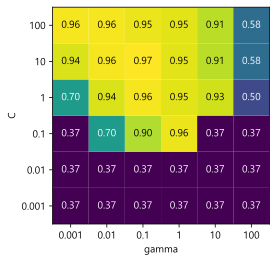

In [71]:
mglearn.tools.heatmap(scores, xlabel='gamma', ylabel='C',
                      xticklabels=param_grid['gamma'], yticklabels=param_grid['C'], cmap='viridis')

In [76]:
param_grid = [{'kernel':['rbf'], 'C':kind, 'gamma':kind}, {'kernel':['linear'], 'C':kind}]

In [81]:
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5, return_train_score=True).fit(X_train, y_train)
grid.best_score_, grid.best_params_, grid.score(X_test, y_test)

(0.9731225296442687,
 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'},
 0.9736842105263158)

In [82]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000999,2.604771e-06,0.000400,0.000490,0.001,0.001,rbf,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",0.347826,0.347826,...,0.366403,0.022485,27,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
1,0.000402,4.920876e-04,0.000601,0.000490,0.001,0.01,rbf,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}",0.347826,0.347826,...,0.366403,0.022485,27,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
2,0.001001,1.784161e-07,0.000200,0.000401,0.001,0.1,rbf,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}",0.347826,0.347826,...,0.366403,0.022485,27,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
3,0.000801,4.003287e-04,0.000200,0.000400,0.001,1,rbf,"{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}",0.347826,0.347826,...,0.366403,0.022485,27,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
4,0.000801,4.003287e-04,0.000200,0.000400,0.001,10,rbf,"{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}",0.347826,0.347826,...,0.366403,0.022485,27,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
5,0.000601,4.904465e-04,0.000601,0.000490,0.001,100,rbf,"{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}",0.347826,0.347826,...,0.366403,0.022485,27,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
6,0.001001,1.168008e-07,0.000000,0.000000,0.01,0.001,rbf,"{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}",0.347826,0.347826,...,0.366403,0.022485,27,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
7,0.000400,4.902712e-04,0.000600,0.000490,0.01,0.01,rbf,"{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}",0.347826,0.347826,...,0.366403,0.022485,27,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
8,0.000600,4.902518e-04,0.000400,0.000490,0.01,0.1,rbf,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}",0.347826,0.347826,...,0.366403,0.022485,27,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
9,0.000801,4.003287e-04,0.000200,0.000400,0.01,1,rbf,"{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",0.347826,0.347826,...,0.366403,0.022485,27,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581


In [86]:
param_dist = [{'kernel':['rbf'], 'C':loguniform(0.001, 100), 'gamma':loguniform(0.001, 100)}, {'kernel':['linear'], 'C':loguniform(0.001, 100)}]

In [90]:
rand = RandomizedSearchCV(SVC(), param_distributions=param_dist, n_iter=100, return_train_score=True).fit(X_train, y_train)
rand.best_score_, rand.best_params_, rand.score(X_test, y_test)

(0.9818181818181818,
 {'C': 1.4450001262407421, 'kernel': 'linear'},
 0.9736842105263158)